## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## 2. Импорт и предобработка данных

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [5]:
df.shape

(887, 8)

In [6]:
df.drop('Name', axis=1, inplace=True)

In [7]:
target = 'Survived'

In [8]:
data_types = df.dtypes

cat_features = data_types[data_types == 'object'].index.tolist()

In [9]:
num_features = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

num_features = [i for i in num_features if i != target]

## 3. Маленький разведочный анализ

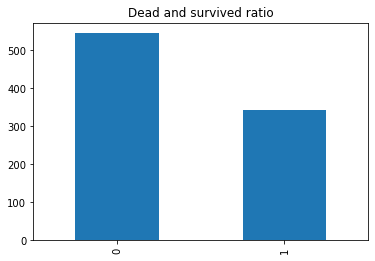

In [10]:
df[target].value_counts().plot.bar()
plt.title('Dead and survived ratio')
plt.show()

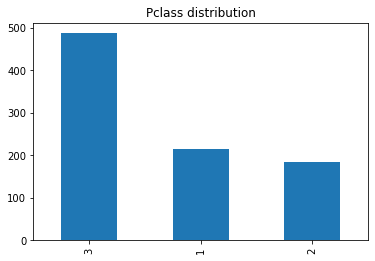

In [11]:
df['Pclass'].value_counts().plot.bar()
plt.title('Pclass distribution')
plt.show()

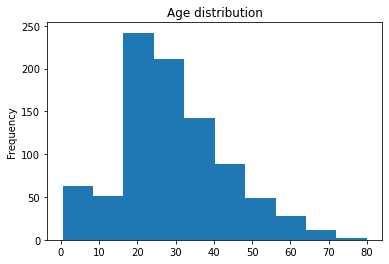

In [12]:
df['Age'].plot.hist()
plt.title('Age distribution')
plt.show()

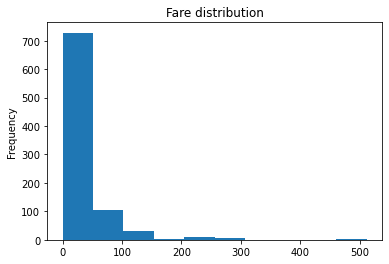

In [13]:
df['Fare'].plot.hist()
plt.title('Fare distribution')
plt.show()

## 4. Разбивка и обработка данных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), df[target],
    test_size=0.2,
    stratify=df[target],
    random_state=22)

In [15]:
transformer = ColumnTransformer(
    [('cat_trans', OneHotEncoder(), cat_features),
     ('num_trans', MinMaxScaler(), num_features)]
)

In [16]:
X_train = transformer.fit_transform(X_train)

In [17]:
X_test = transformer.transform(X_test)

## 5. Классификация с помощью KNN

## 5.1. Базовая модель

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_approx = knn.predict(X_train)

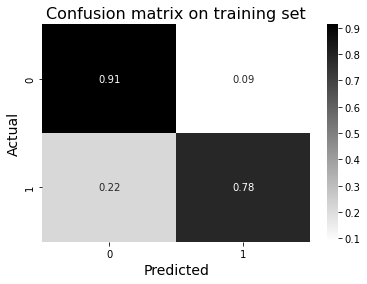

In [21]:
conf_train = confusion_matrix(y_train, y_approx, normalize='true')

sns.heatmap(conf_train, annot=True, fmt='.2f', cmap='binary')
plt.title('Confusion matrix on training set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
plt.show()

In [22]:
accuracy_score(y_train, y_approx)

0.8631875881523272

In [23]:
y_pred = knn.predict(X_test)

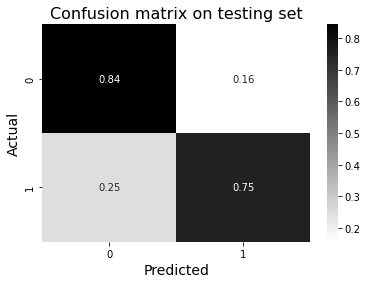

In [24]:
conf_test = confusion_matrix(y_test, y_pred, normalize='true')

sns.heatmap(conf_test, annot=True, fmt='.2f', cmap='binary')
plt.title('Confusion matrix on testing set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
plt.show()

In [25]:
accuracy_score(y_test, y_pred)

0.8089887640449438

## 5.2. Перекрестная проверка и поиск по сетке

In [26]:
cv = KFold(n_splits=5, shuffle=True, random_state=22)

In [27]:
cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=cv)

array([0.78169014, 0.79577465, 0.78873239, 0.83802817, 0.85815603])

In [28]:
knn = KNeighborsClassifier()

gs = GridSearchCV(
    estimator=knn,
    param_grid={'n_neighbors': np.arange(6, 21, 2)}, 
    n_jobs=-1, 
    scoring='f1',
    cv=cv)

In [29]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 6,  8, 10, 12, 14, 16, 18, 20])},
             scoring='f1')

In [30]:
best_hypo = gs.best_params_
best_hypo

{'n_neighbors': 12}

In [31]:
y_pred = gs.predict(X_test)

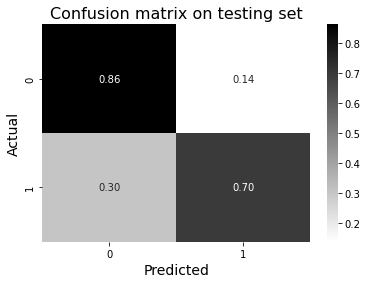

In [32]:
conf_test = confusion_matrix(y_test, y_pred, normalize='true')

sns.heatmap(conf_test, annot=True, fmt='.2f', cmap='binary')
plt.title('Confusion matrix on testing set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
plt.show()